In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [4]:
# Load titanic data set from csv
os.chdir('C:\master_data_science')

titanic_df = pd.read_csv('train (3).csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Remove all na value from test set 
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

print("=== Null counts ===", titanic_df.isnull().sum().sum())

=== Null counts === 0


In [7]:
print("Distribution for Sex : \n", titanic_df['Sex'].value_counts())
print("Distribution for Cabin : \n", titanic_df['Cabin'].value_counts())
print("Distribution for Embarked : \n", titanic_df['Embarked'].value_counts())


Distribution for Sex : 
 male      577
female    314
Name: Sex, dtype: int64
Distribution for Cabin : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
B79              1
E17              1
B42              1
D56              1
B86              1
Name: Cabin, Length: 148, dtype: int64
Distribution for Embarked : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [9]:
print("Distribution for Sex : \n", titanic_df['Sex'].value_counts())
print("Distribution for Cabin : \n", titanic_df['Cabin'].value_counts())
print("Distribution for Embarked : \n", titanic_df['Embarked'].value_counts())

Distribution for Sex : 
 male      577
female    314
Name: Sex, dtype: int64
Distribution for Cabin : 
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
Distribution for Embarked : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [11]:
# group by sex, survived

titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

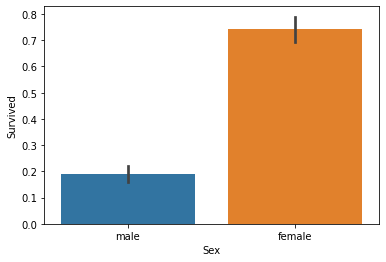

In [12]:
sns.barplot(x='Sex', y = 'Survived' , data=titanic_df)

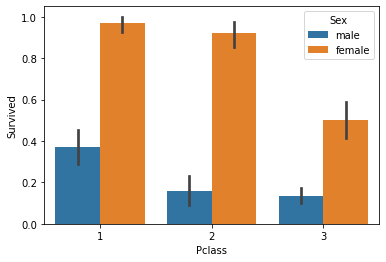

In [13]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

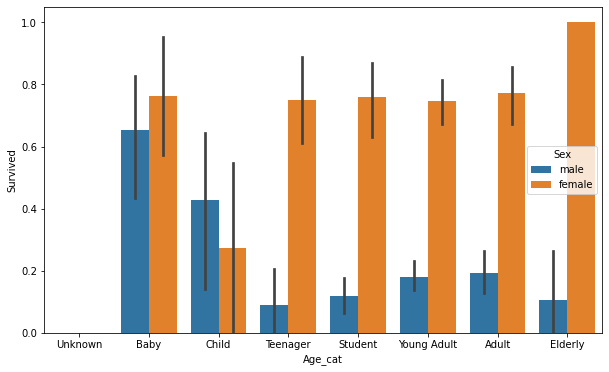

In [14]:
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Child', 'Teenager','Student','Young Adult','Adult','Elderly']

# Use lambda for converting age
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot( x = 'Age_cat', y = 'Survived', hue = 'Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace = True)

In [15]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin','Sex','Embarked']
    
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [17]:
# Drop the unnecessary field (PassengerId, Name, Ticket)
titanic_df.drop(['PassengerId', 'Name','Ticket'], axis = 1, inplace = True)

In [18]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

In [19]:
# Describe data set 
y_titanic_df
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

In [21]:
#1. DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_clf = DecisionTreeClassifier(random_state = 11)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("== DecisionTree Accuracy : {0:.4f}".format(accuracy_score(y_test, dt_pred)))

== DecisionTree Accuracy : 0.7877


In [22]:
#2. RandomForest 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("== RandomForest Accuracy : {0:.4f}".format(accuracy_score(y_test, rf_pred)))


== RandomForest Accuracy : 0.8547


In [23]:
#3. LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("== LogisticRegression Accuracy : {0:.4f}".format(accuracy_score(y_test, lr_pred)))

== LogisticRegression Accuracy : 0.8492


C:\Users\HP\.InstallAnywhere\conda2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.model_selection import KFold

def exec_Kfold(clf, folds = 5) :
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        X_train, X_test = X_titanic_df.values[train_index] , X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index] , y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        
        predictions = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("=== Cross validaty {0} , Accuracy : {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("== Mean accuracy : {0:.4f} ".format(mean_score))
    
#exec_kfolds
exec_Kfold(dt_clf, folds = 5)


=== Cross validaty 0 , Accuracy : 0.7542
=== Cross validaty 1 , Accuracy : 0.7809
=== Cross validaty 2 , Accuracy : 0.7865
=== Cross validaty 3 , Accuracy : 0.7697
=== Cross validaty 4 , Accuracy : 0.8202
== Mean accuracy : 0.7823 


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv= 5)

for iter_count, accuracy in enumerate(scores) :
     print("=== Cross validaty {0} , Accuracy : {1:.4f}".format(iter_count, accuracy))
        
print("== Mean accuracy : {0:.4f} ".format(np.mean(scores)))

=== Cross validaty 0 , Accuracy : 0.7430
=== Cross validaty 1 , Accuracy : 0.7753
=== Cross validaty 2 , Accuracy : 0.7921
=== Cross validaty 3 , Accuracy : 0.7865
=== Cross validaty 4 , Accuracy : 0.8427
== Mean accuracy : 0.7879 


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10]
             , 'min_samples_split':[2,3,5]
             , 'min_samples_leaf':[1,5,8] }

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV best hyper parameter : ", grid_dclf.best_params_)
print("GridSearchCV best accuracy : " , grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test, dpredictions) 

print("Test Set DecisionTreeClassifier accuracy : {0:.4f}".format(accuracy))


GridSearchCV best hyper parameter :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV best accuracy :  0.7991825076332119
Test Set DecisionTreeClassifier accuracy : 0.8715


In [27]:
# Load titanic test data set from csv
titanic_test_df = pd.read_csv('test (1).csv')
titanic_test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [28]:
# Drop table for test set
# Drop the unnecessary field (PassengerId /*remained for making answer sheet*/ , Name, Ticket)
titanic_test_df.drop([ 'Name','Ticket'], axis = 1, inplace = True)

In [29]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [30]:
# Replace all na value from test set 
titanic_test_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_test_df['Cabin'].fillna('N', inplace = True)
titanic_test_df['Embarked'].fillna('N', inplace = True)

print("=== Null counts ===", titanic_test_df.isnull().sum().sum())

=== Null counts === 1


In [31]:
titanic_test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [32]:
titanic_test_df[titanic_test_df['Fare'].isna() == True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,male,60.5,0,0,NaN,N,S


In [33]:
# Fare missing data is Pclass 3 and age is over 60, so i allocate fare 0 (or min)

titanic_test_df['Fare'].min()
titanic_test_df['Fare'].fillna( 0, inplace = True)

In [34]:
# Discover test data set again
print("=== Null counts ===", titanic_test_df.isnull().sum().sum())

=== Null counts === 0


In [35]:
# Convert Cabin grade to first letter
titanic_test_df['Cabin'] = titanic_test_df['Cabin'].str[:1]
print(titanic_test_df['Cabin'].value_counts())

N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64


In [36]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [37]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [38]:
# 1. drop first row , and store the another array

titanic_passenger_id = titanic_test_df['PassengerId']
titanic_test_df = titanic_test_df.drop('PassengerId',axis = 1)

In [39]:
titanic_test_df = encode_features(titanic_test_df)
titanic_test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.500000,0,0,7.8292,7,1
1,3,0,47.000000,1,0,7.0000,7,2
2,2,1,62.000000,0,0,9.6875,7,1
3,3,1,27.000000,0,0,8.6625,7,2
4,3,0,22.000000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,7,2
414,1,0,39.000000,0,0,108.9000,2,0
415,3,1,38.500000,0,0,7.2500,7,2
416,3,1,29.699118,0,0,8.0500,7,2


In [40]:
# predict using best_estimator

titanic_test_df['Survived'] = best_dclf.predict(titanic_test_df)

In [41]:
titanic_test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,34.500000,0,0,7.8292,7,1,0
1,3,0,47.000000,1,0,7.0000,7,2,1
2,2,1,62.000000,0,0,9.6875,7,1,0
3,3,1,27.000000,0,0,8.6625,7,2,0
4,3,0,22.000000,1,1,12.2875,7,2,1
...,...,...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,7,2,0
414,1,0,39.000000,0,0,108.9000,2,0,1
415,3,1,38.500000,0,0,7.2500,7,2,0
416,3,1,29.699118,0,0,8.0500,7,2,0


In [42]:
titanic_test_df.insert(loc=0, column = 'PassengerId', value=titanic_passenger_id)

In [43]:
titanic_test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,1,34.500000,0,0,7.8292,7,1,0
1,893,3,0,47.000000,1,0,7.0000,7,2,1
2,894,2,1,62.000000,0,0,9.6875,7,1,0
3,895,3,1,27.000000,0,0,8.6625,7,2,0
4,896,3,0,22.000000,1,1,12.2875,7,2,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0,8.0500,7,2,0
414,1306,1,0,39.000000,0,0,108.9000,2,0,1
415,1307,3,1,38.500000,0,0,7.2500,7,2,0
416,1308,3,1,29.699118,0,0,8.0500,7,2,0


In [44]:
# csv output
submission_data_set = titanic_test_df[['PassengerId','Survived']]

In [45]:
submission_data_set

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
submission_data_set.to_csv('submission.csv'
                          , sep = ','
                          , na_rep = 'NaN'
                          , index = False)

In [47]:
from sklearn.metrics import precision_recall_curve

# predict when label value is 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# insert precision_recall_curve probabilites when both actual data and label data are 1
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('Shape of returned classified threshold array : ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('Top 10 index of thresholds array :', thr_index)
print('Sample 10 thresholds : ', np.round(thresholds[thr_index], 3))

print('Sample precision value :', np.round(precisions[thr_index],3))
print('Sample recall value : ', np.round(recalls[thr_index],3))

Shape of returned classified threshold array :  (143,)
Top 10 index of thresholds array : [  0  15  30  45  60  75  90 105 120 135]
Sample 10 thresholds :  [0.104 0.121 0.14  0.186 0.281 0.404 0.565 0.667 0.822 0.947]
Sample precision value : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
Sample recall value :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


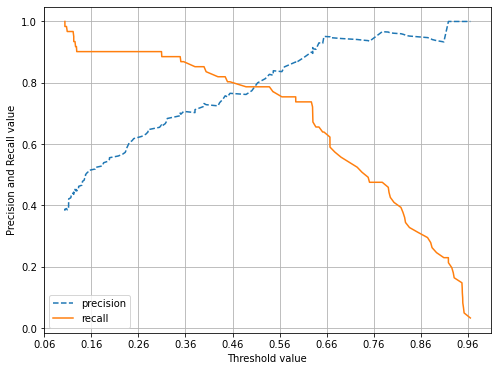

In [48]:
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1) 
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [49]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, lr_pred)
print('F1 score is : {0:.4f}'.format(f1))

F1 score is : 0.7805


In [50]:
from sklearn.metrics import roc_curve

# Proability when label is 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# Set a setp 5, except threshhold[0] because set a value randomly max(prob)+1 -> np.arange to start offset 1
thr_index = np.arange(1, thresholds.shape[0], 5)

print('======= thr index 10 arrary : ', thr_index)
print('sample 10 indexs thresholds : ', np.round(thresholds[thr_index], 2))

print('sample thresholds fpr:', np.round(fprs[thr_index], 3))
print('sample thresholds tpr:', np.round(tprs[thr_index], 3))

======= thr index 10 arrary :  [ 1  6 11 16 21 26 31 36 41 46 51]
sample 10 indexs thresholds :  [0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
sample thresholds fpr: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
sample thresholds tpr: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


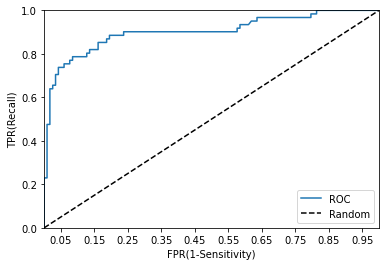

In [51]:
def roc_curve_plot(y_test, pred_proba_c1) :
    fprs , tprs, thresholds = roc_curve(y_test, pred_proba_c1) 
    
    # Draw roc curve by plot
    plt.plot(fprs, tprs, label='ROC')
    
    # Draw straight line 
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # fpr X axis scale to 0.1
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class1)
    